In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from hyperopt import hp, Trials, rand, tpe, fmin
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

In [52]:
# def f(x):
#     return -np.sin(3*x) - x**2 - 0.7*x

X, y = load_diabetes(return_X_y=True)

def f(alpha):
    reg = Lasso(alpha)
    reg.fit(X,y)
    score = cross_val_score(reg, X, y, scoring='neg_mean_squared_error').mean()
    return score

In [46]:
x = np.linspace(0, 1, 1000)
y = f(x)
y_min = min(y)
x_min = x[np.argmin(y)]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [19]:
print(x_min)

0.8238238238238238


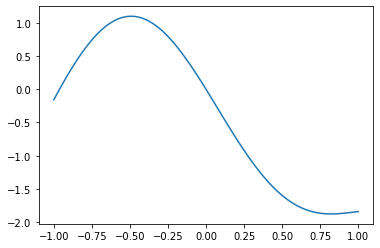

In [7]:
plt.plot(x, y)

In [48]:
mesh = hp.uniform('x', 0, 1)

In [47]:
tpe_trials = Trials()
rand_trials = Trials()

tpe_algo = tpe.suggest
rand_algo = rand.suggest

In [53]:
tpe_best = fmin(fn=f, space=mesh, algo=tpe_algo, trials=tpe_trials, max_evals=2000, rstate=np.random.RandomState(123))
print(tpe_best)

rand_best = fmin(fn=f, space=mesh, algo=rand_algo, trials=rand_trials, max_evals=2000, rstate=np.random.RandomState(123))
print(rand_best)

100%|██████████| 2000/2000 [00:40<00:00, 49.45trial/s, best loss: -3850.8263203009105]
{'x': 0.9999925187354476}
100%|██████████| 2000/2000 [00:23<00:00, 86.80trial/s, best loss: -3850.6866400834924]
{'x': 0.9998891126958509}


In [54]:
tpe_results = pd.DataFrame({
    'iteration': tpe_trials.idxs_vals[0]['x'], 
    'x': tpe_trials.idxs_vals[1]['x'],
    'loss': [row['loss'] for row in tpe_trials.results]
})

rand_results = pd.DataFrame({
    'iteration': rand_trials.idxs_vals[0]['x'], 
    'x': rand_trials.idxs_vals[1]['x'],
    'loss': [row['loss'] for row in rand_trials.results]
})

In [23]:
tpe_trials.idxs_vals

({'x': [0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   59,
   60,
   61,
   62,
   63,
   64,
   65,
   66,
   67,
   68,
   69,
   70,
   71,
   72,
   73,
   74,
   75,
   76,
   77,
   78,
   79,
   80,
   81,
   82,
   83,
   84,
   85,
   86,
   87,
   88,
   89,
   90,
   91,
   92,
   93,
   94,
   95,
   96,
   97,
   98,
   99,
   100,
   101,
   102,
   103,
   104,
   105,
   106,
   107,
   108,
   109,
   110,
   111,
   112,
   113,
   114,
   115,
   116,
   117,
   118,
   119,
   120,
   121,
   122,
   123,
   124,
   125,
   126,
   127,
   128,
   129,
   130,
   131,
   132,
   133,
   134,
   135,
   136,
   137,
 

In [29]:
tpe_results.head()

,iteration,x,loss
0,0,0.456060,-1.506777
1,1,0.717388,-1.852529
2,2,0.985036,-1.845227
3,3,0.346955,-1.226087
4,4,0.125230,-0.470257


Text(0, 0.5, 'Value of x')

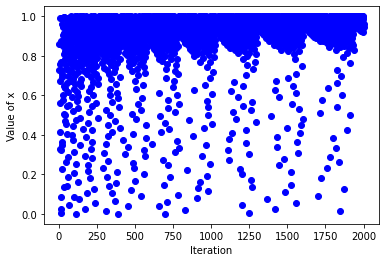

In [55]:
plt.plot(tpe_results['iteration'], tpe_results['x'], 'bo')
plt.xlabel('Iteration')
plt.ylabel('Value of x')

Text(0, 0.5, 'Value of x')

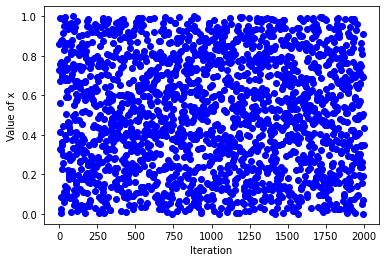

In [56]:
plt.plot(rand_results['iteration'], rand_results['x'], 'bo')
plt.xlabel('Iteration')
plt.ylabel('Value of x')

(array([  27.,   25.,   30.,   35.,   37.,   43.,   51.,   95.,  344.,
        1313.]),
 array([6.28326809e-04, 1.00564746e-01, 2.00501165e-01, 3.00437584e-01,
        4.00374004e-01, 5.00310423e-01, 6.00246842e-01, 7.00183261e-01,
        8.00119680e-01, 9.00056100e-01, 9.99992519e-01]),
 <a list of 10 Patch objects>)

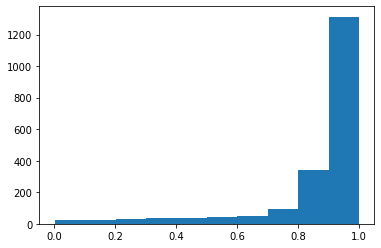

In [57]:
plt.hist(tpe_results['x'])

(array([187., 206., 193., 208., 211., 199., 189., 216., 185., 206.]),
 array([5.01240241e-04, 1.00440027e-01, 2.00378815e-01, 3.00317602e-01,
        4.00256389e-01, 5.00195176e-01, 6.00133964e-01, 7.00072751e-01,
        8.00011538e-01, 8.99950325e-01, 9.99889113e-01]),
 <a list of 10 Patch objects>)

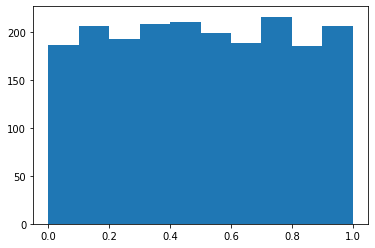

In [58]:
plt.hist(rand_results['x'])